In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import numpy as np
from itertools import chain
from collections import defaultdict
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer

**VERİ SETİ YÜKLE ve GENEL BİLGİLERİ AL**

In [132]:
veriseti = pd.read_csv("data/train.csv") 
veriseti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


**VERİ SETİ İLE İLGİLİ İSTATİSTİKİ BİLGİLERİ AL**

In [133]:
veriseti.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**SINIF DAĞILIMLARINI AL**

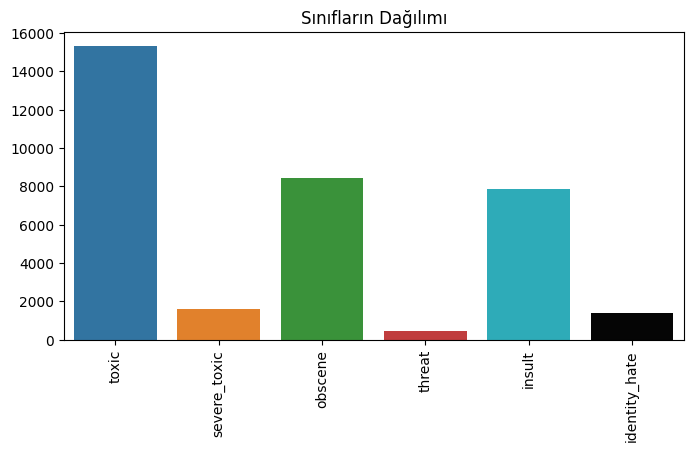

In [135]:
label_count = veriseti[veriseti.columns[2:]].sum()
label_count

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf', '#050505']
plt.figure(figsize=(8,4))
sns.barplot(x= label_count.index, y = label_count.values, palette= colors)
plt.xticks(rotation=90)
plt.title('Sınıfların Dağılımı', fontsize=12)
plt.show()

**METİN İÇERİSİNDE Kİ KARAKTERLERİN UZUNLUKLARINI AL**

Text(0.5, 1.0, 'Yorum Uzunluklarının Dağılımı')

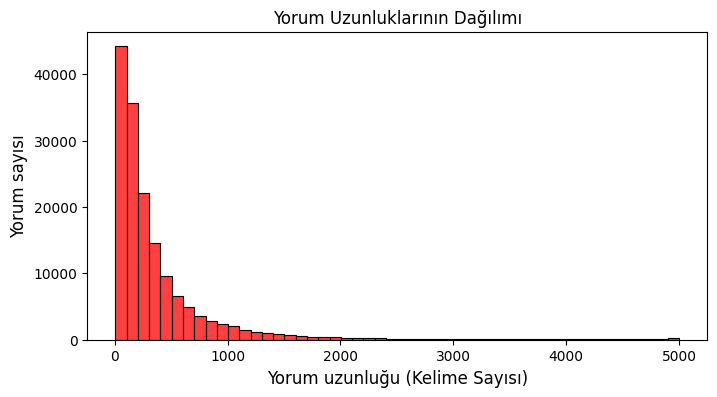

In [136]:
comment_len = veriseti.comment_text.str.len()
plt.figure(figsize=(8,4))
sns.histplot(comment_len, kde=False, bins=50, color="red")
plt.xlabel("Yorum uzunluğu (Kelime Sayısı)", fontsize=12)
plt.ylabel("Yorum sayısı", fontsize=12)
plt.title("Yorum Uzunluklarının Dağılımı", fontsize=12)

**HER SINIF İÇİN METİN İÇERİSİNDE Kİ KARAKTERLERİN UZUNLUKLARINI AL**

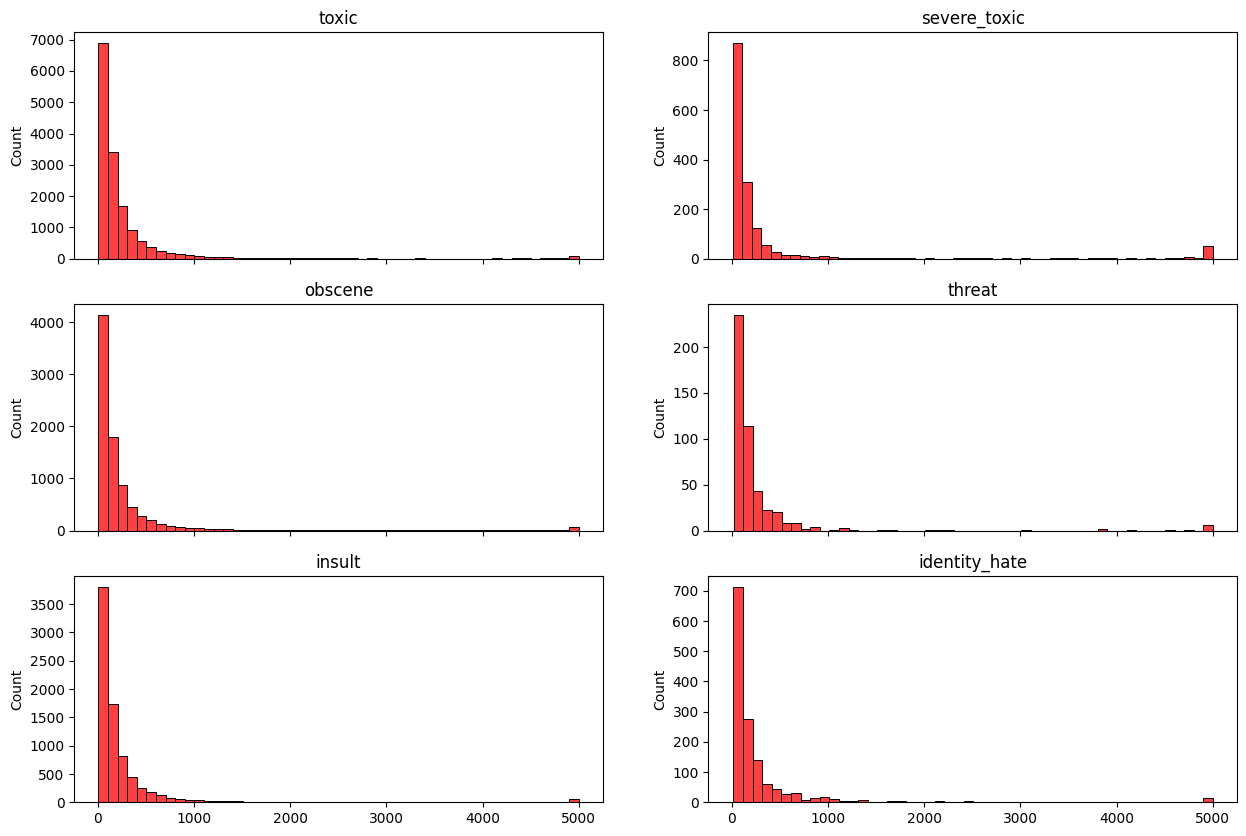

In [138]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10), sharex=True)
axes =ax.ravel()

for i in range(6):
    comments = train.loc[train[labels[i]] == 1, :]
    comment_len = [len(comment) for comment in comments["comment_text"]]
    sns.histplot(comment_len, ax=axes[i], bins = 50, color="red")
    axes[i].title.set_text(labels[i])



**HER SINIF İÇİN METİN İÇERİSİNDE Kİ KELİMELERİN SAYISINI AL**

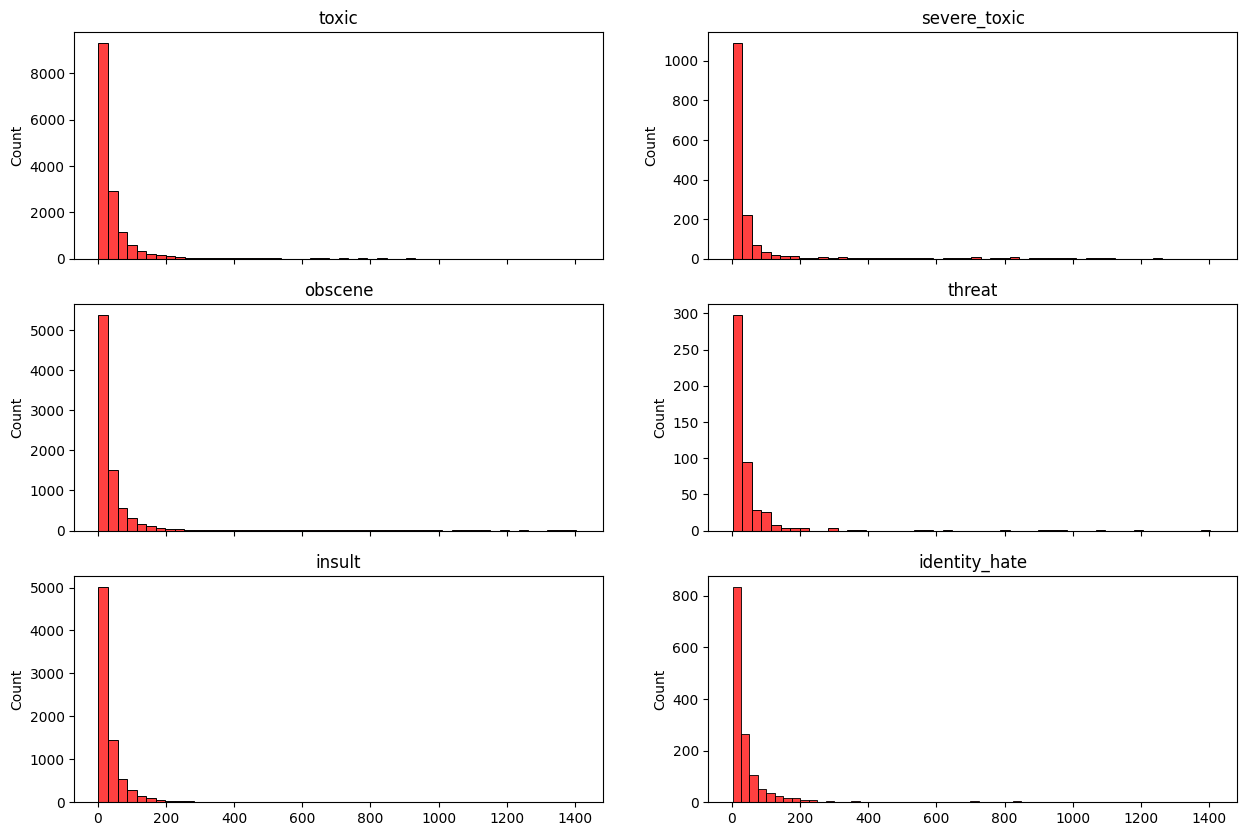

In [139]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10), sharex=True)
axes =ax.ravel()

for i in range(6):
    comments = train.loc[train[labels[i]] == 1, :]
    comment_len = [len(comment.split()) for comment in comments["comment_text"]]
    sns.histplot(comment_len, ax=axes[i], bins = 50, color="red")
    axes[i].title.set_text(labels[i])

CORPUS OLUŞTURMA METODU

In [141]:
def create_corpus(target):
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    
    corpus=[]
    
    comments = train.loc[train[target] == 1, :]

    for comment in comments["comment_text"].str.split():
        for i in comment:
            corpus.append(i)
    return corpus

In [ ]:
KENDİ ÖZEL STOPWORDS DOSYAMIZI ALAN İŞLEM ADIMI

In [142]:
stopwords = np.genfromtxt("data/stopword.txt", delimiter='\n', dtype=str) 
stopwords = np.char.replace(stopwords,"'","") 
stopwords = list(filter(None, stopwords)) 

In [143]:
stopwords_all = []
for ix,line in enumerate(stopwords):
    splitted_line = stopwords[ix].split(',')
    splitted_line = list(filter(None, splitted_line))
    stopwords_all.append(splitted_line)
    
stopwords_all = list(chain.from_iterable(stopwords_all)) #listeleri birleştir

EN YAYGIN KULLANILAN KELİMELERİ ALAN METOD

In [144]:
def getTopWords(classname):
    corpus=create_corpus(classname)
    dic=defaultdict(int)
    for word in corpus:
        if word in stopwords_all:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:5] 
    return top

**HER SINIF İÇİN SIK GEÇEN STOPWORDS KELİMELER**

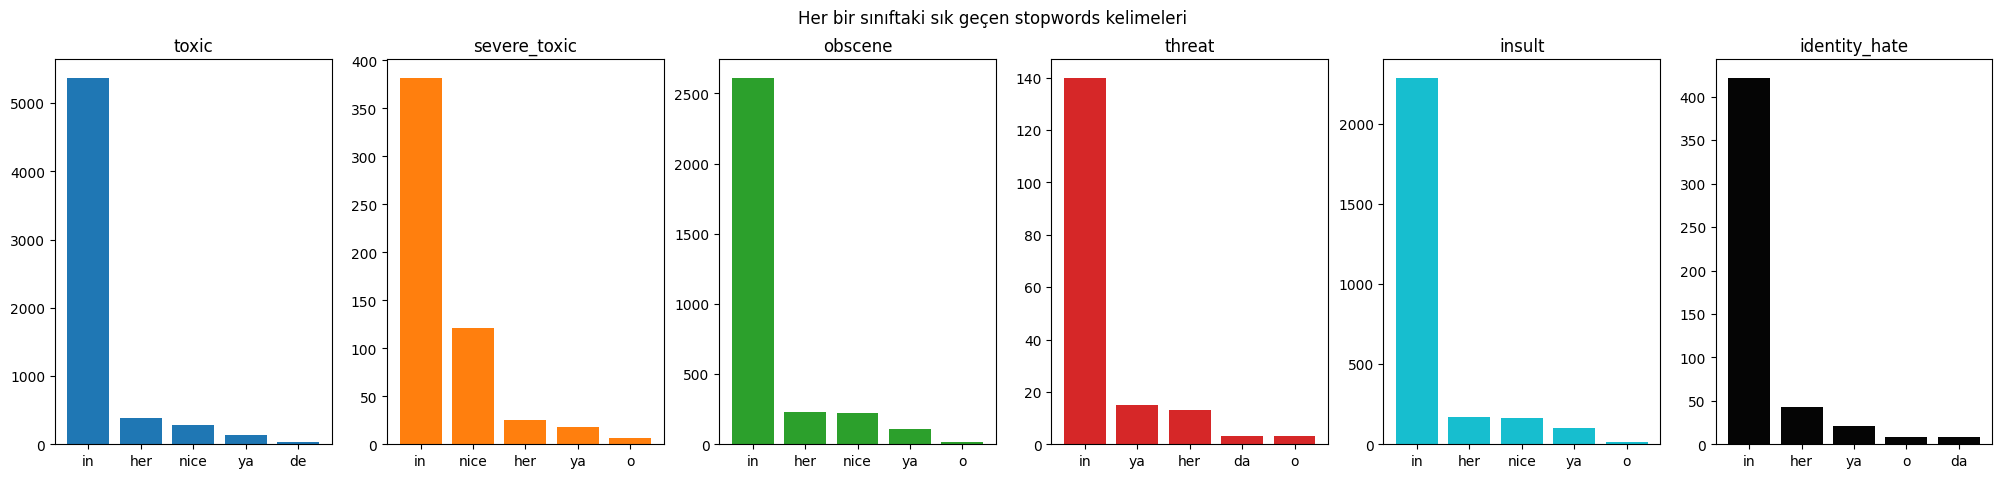

In [145]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
fig,ax = plt.subplots(1,len(labels),figsize=(25,5))
for ix, classname in enumerate(labels):
    top = getTopWords(classname)
    x,y=zip(*top)
    ax[ix].bar(x,y,color=colors[ix])
    ax[ix].set_title(classname)
fig.suptitle('Her bir sınıftaki sık geçen stopwords kelimeleri')
plt.show()

YAYGIN KELİMELERİ ALAN METOD

In [146]:
def getCommonWords(classname, stopwords):
    corpus=create_corpus(classname)
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
    return x,y

**HER SINIF İÇİN SIK GEÇEN KELİMELER**

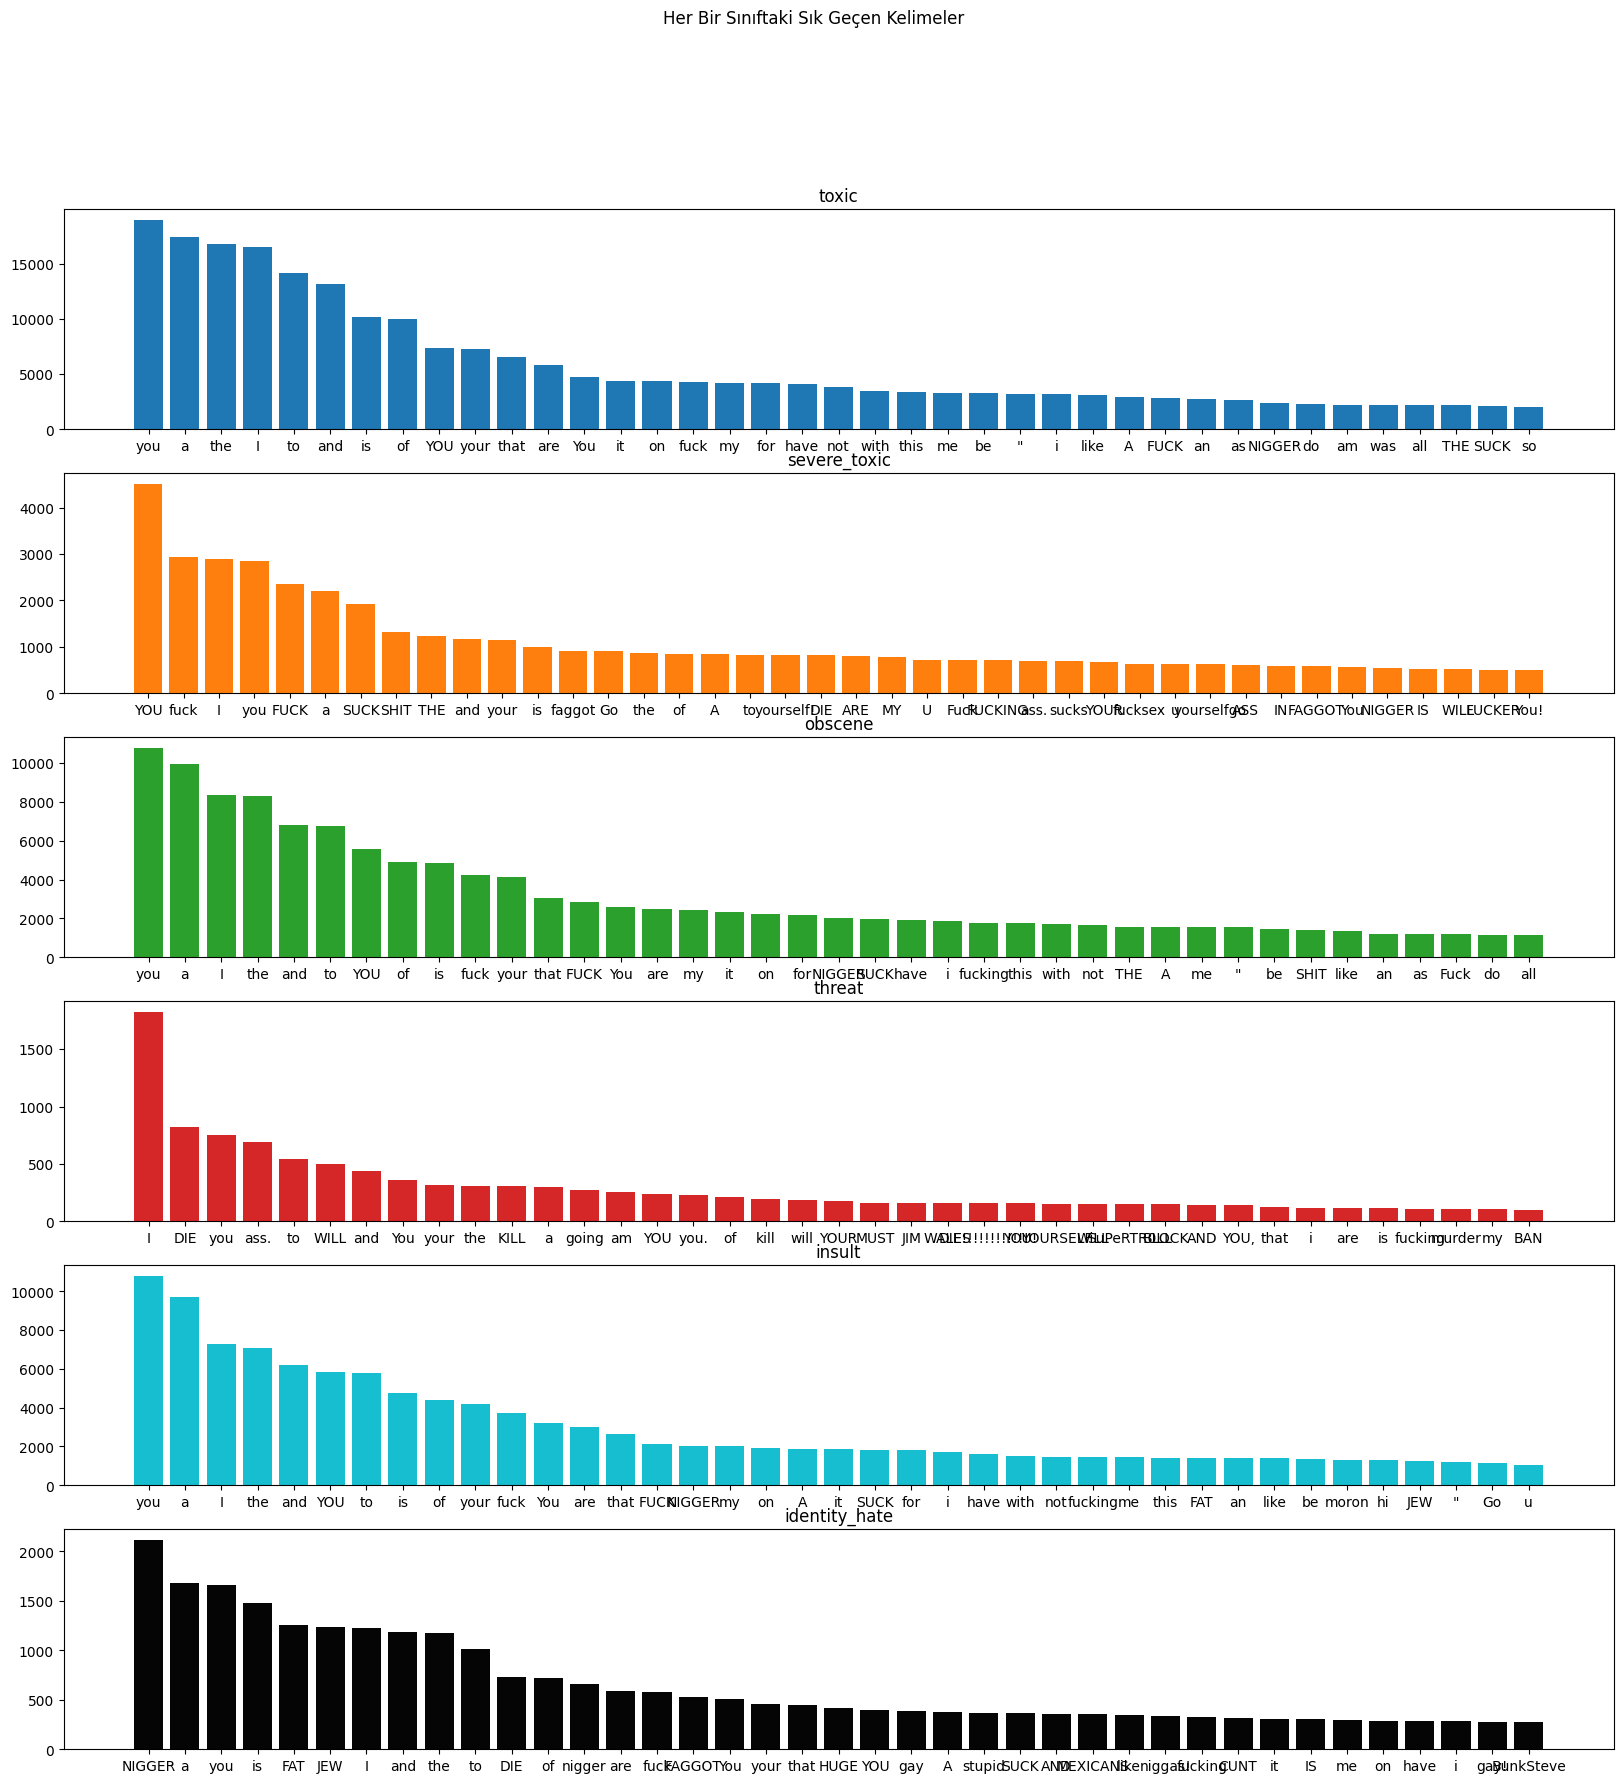

In [147]:
fig,ax = plt.subplots(len(labels),figsize=(20,20))
for ix, classname in enumerate(labels):
    x,y = getCommonWords(classname,stopwords_all)
    ax[ix].bar(x,y,color=colors[ix])
    ax[ix].set_title(classname)
fig.suptitle('Her Bir Sınıftaki Sık Geçen Kelimeler')
plt.show()

**HER SINIF İÇİN SIK GEÇEN SPECIAL CHARACTERS KELİMELER**

In [148]:
special_characters = '\-;%()|+&=*%.”“’,!?:#$@\[\]/<>]'
def getPunctuations(classname, special_characters):
    corpus=create_corpus(classname)
    dic=defaultdict(int)
    for i in (corpus):
        if i in special_characters:
            dic[i]+=1
    if not bool(dic.items()):
        dic['']=0
    return dic

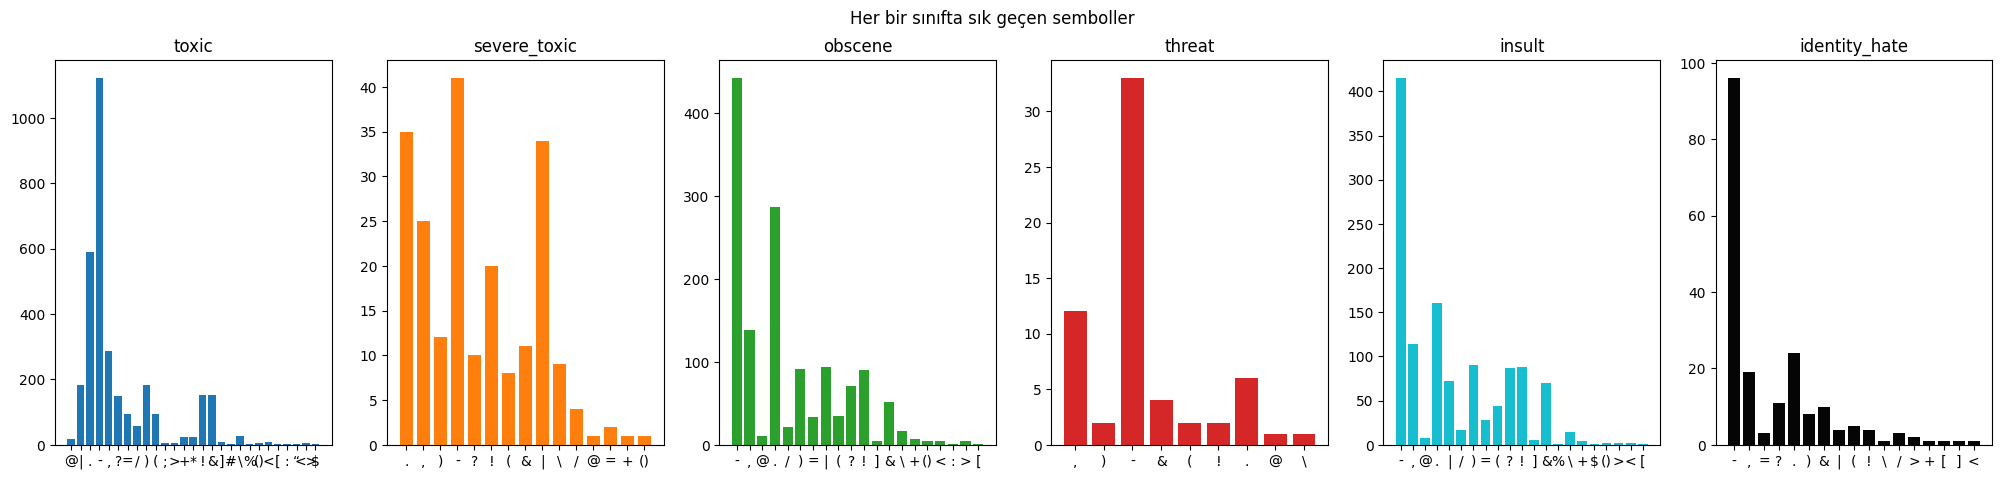

In [149]:
fig,ax = plt.subplots(1,len(labels),figsize=(25,5))
for ix, classname in enumerate(labels):
    dic = getPunctuations(classname,special_characters)
    x,y=zip(*dic.items())
    ax[ix].bar(x,y,color=colors[ix])
    ax[ix].set_title(classname)
fig.suptitle('Her bir sınıfta sık geçen semboller')
plt.show()

**HER SINIF İÇİN SIK BIGRAM ANALIZI**

In [150]:
def get_top_text_bigrams(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

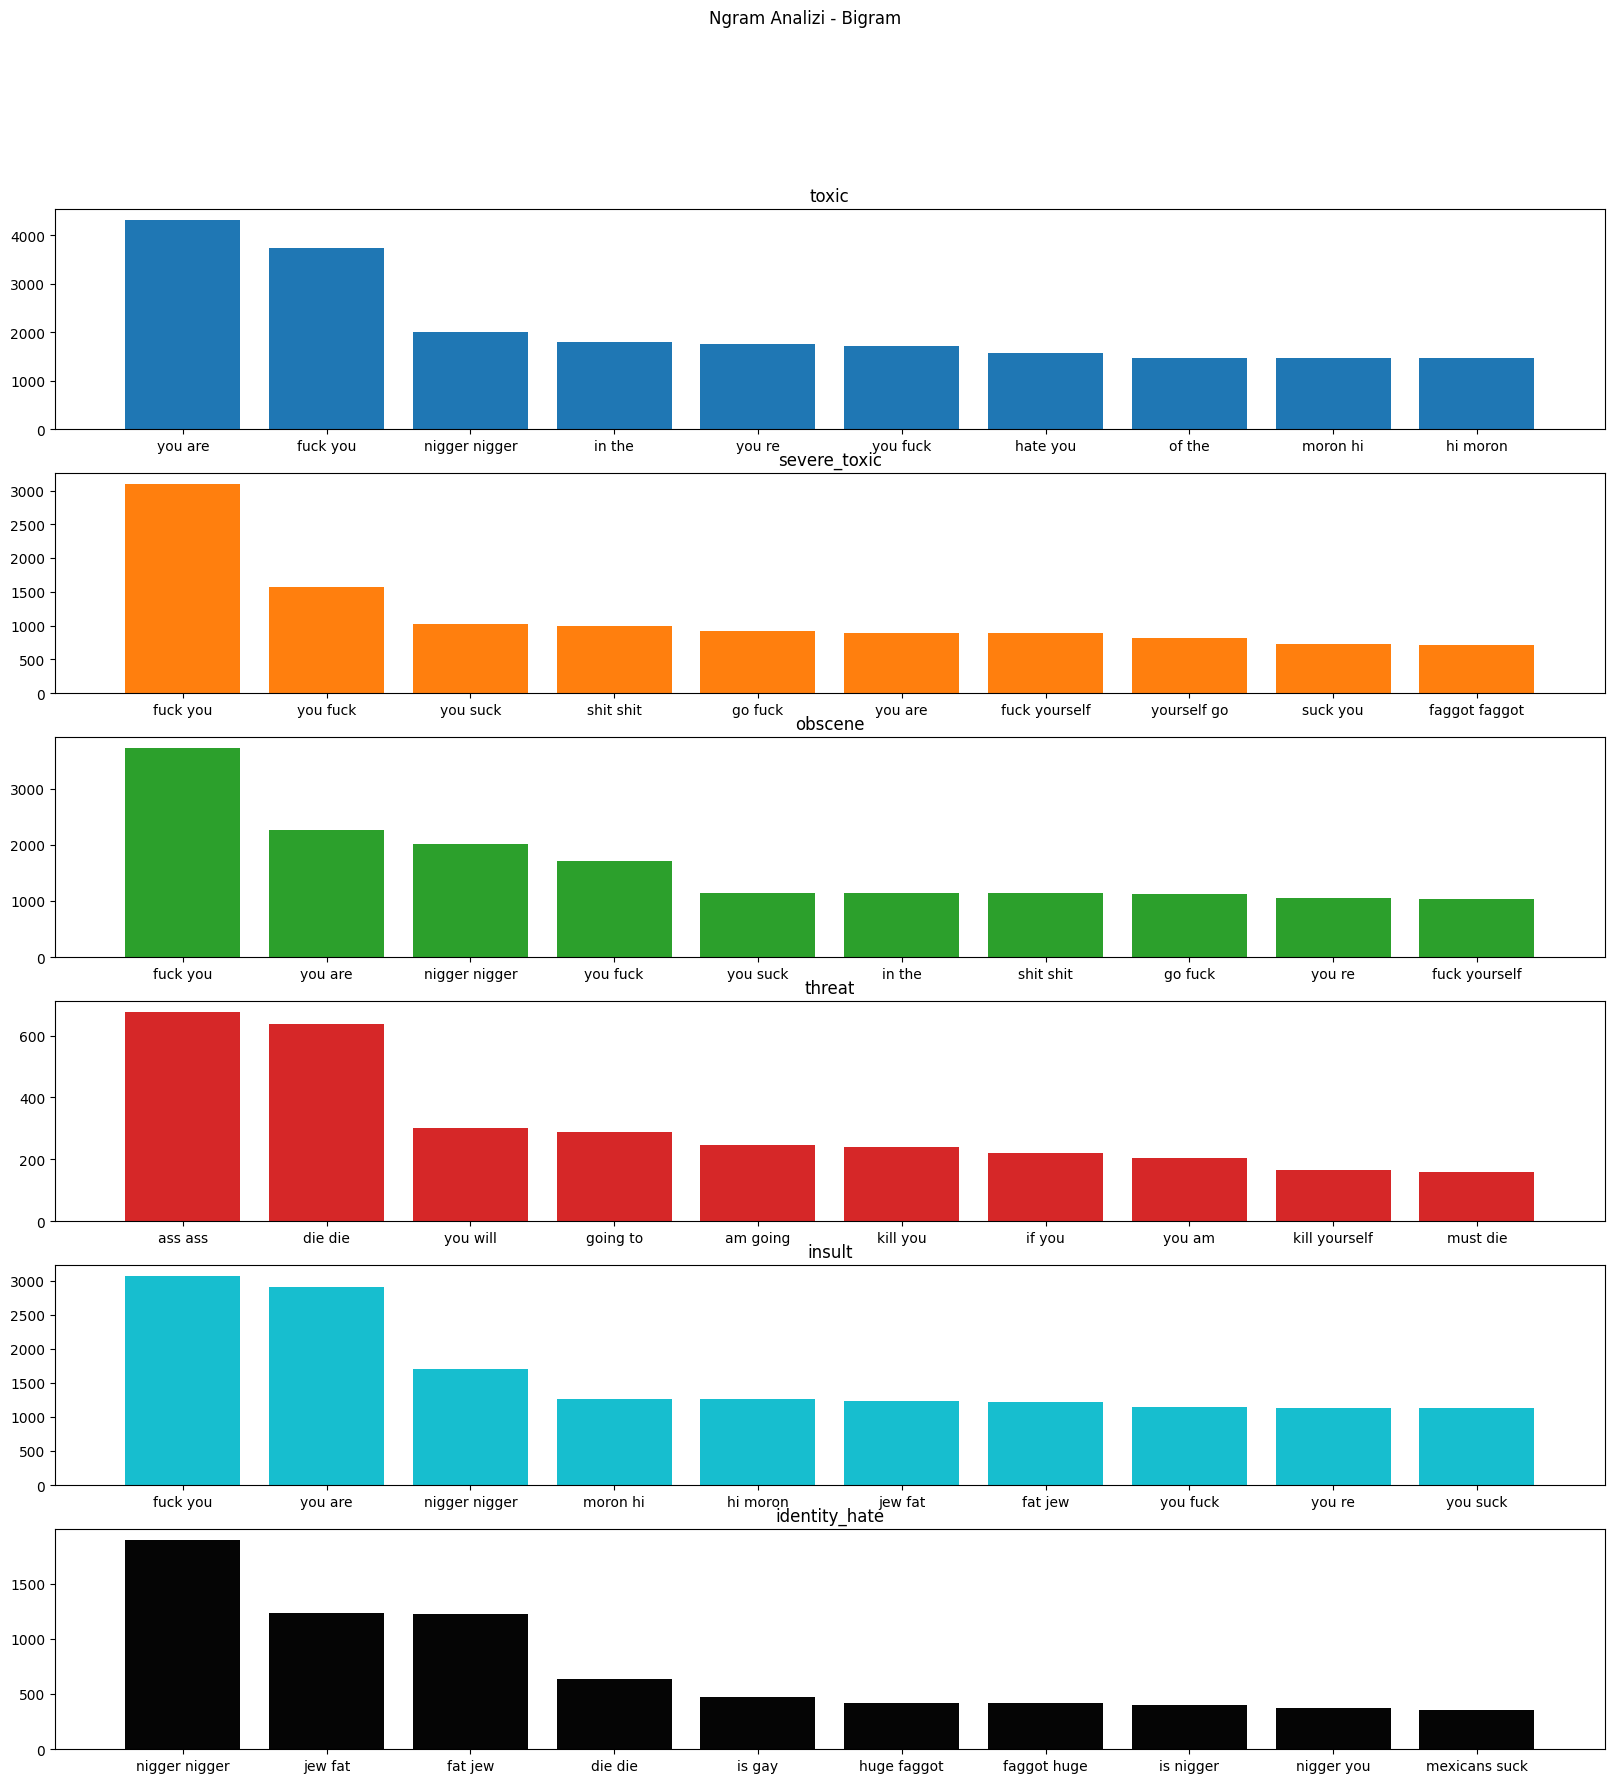

In [151]:
fig,ax = plt.subplots(len(labels),figsize=(20,20))
for ix, classname in enumerate(labels):
    corpus=create_corpus(classname)
    top_text_bigrams=get_top_text_bigrams(train.loc[train[labels[ix]] == 1, :]['comment_text'], ngram=2)[:10]
    x,y=map(list,zip(*top_text_bigrams))
    ax[ix].bar(x,y,color=colors[ix])
    ax[ix].set_title(classname)
fig.suptitle('Ngram Analizi - Bigram')
plt.show()

**HER SINIF İÇİN SIK TRIGRAM ANALIZI**

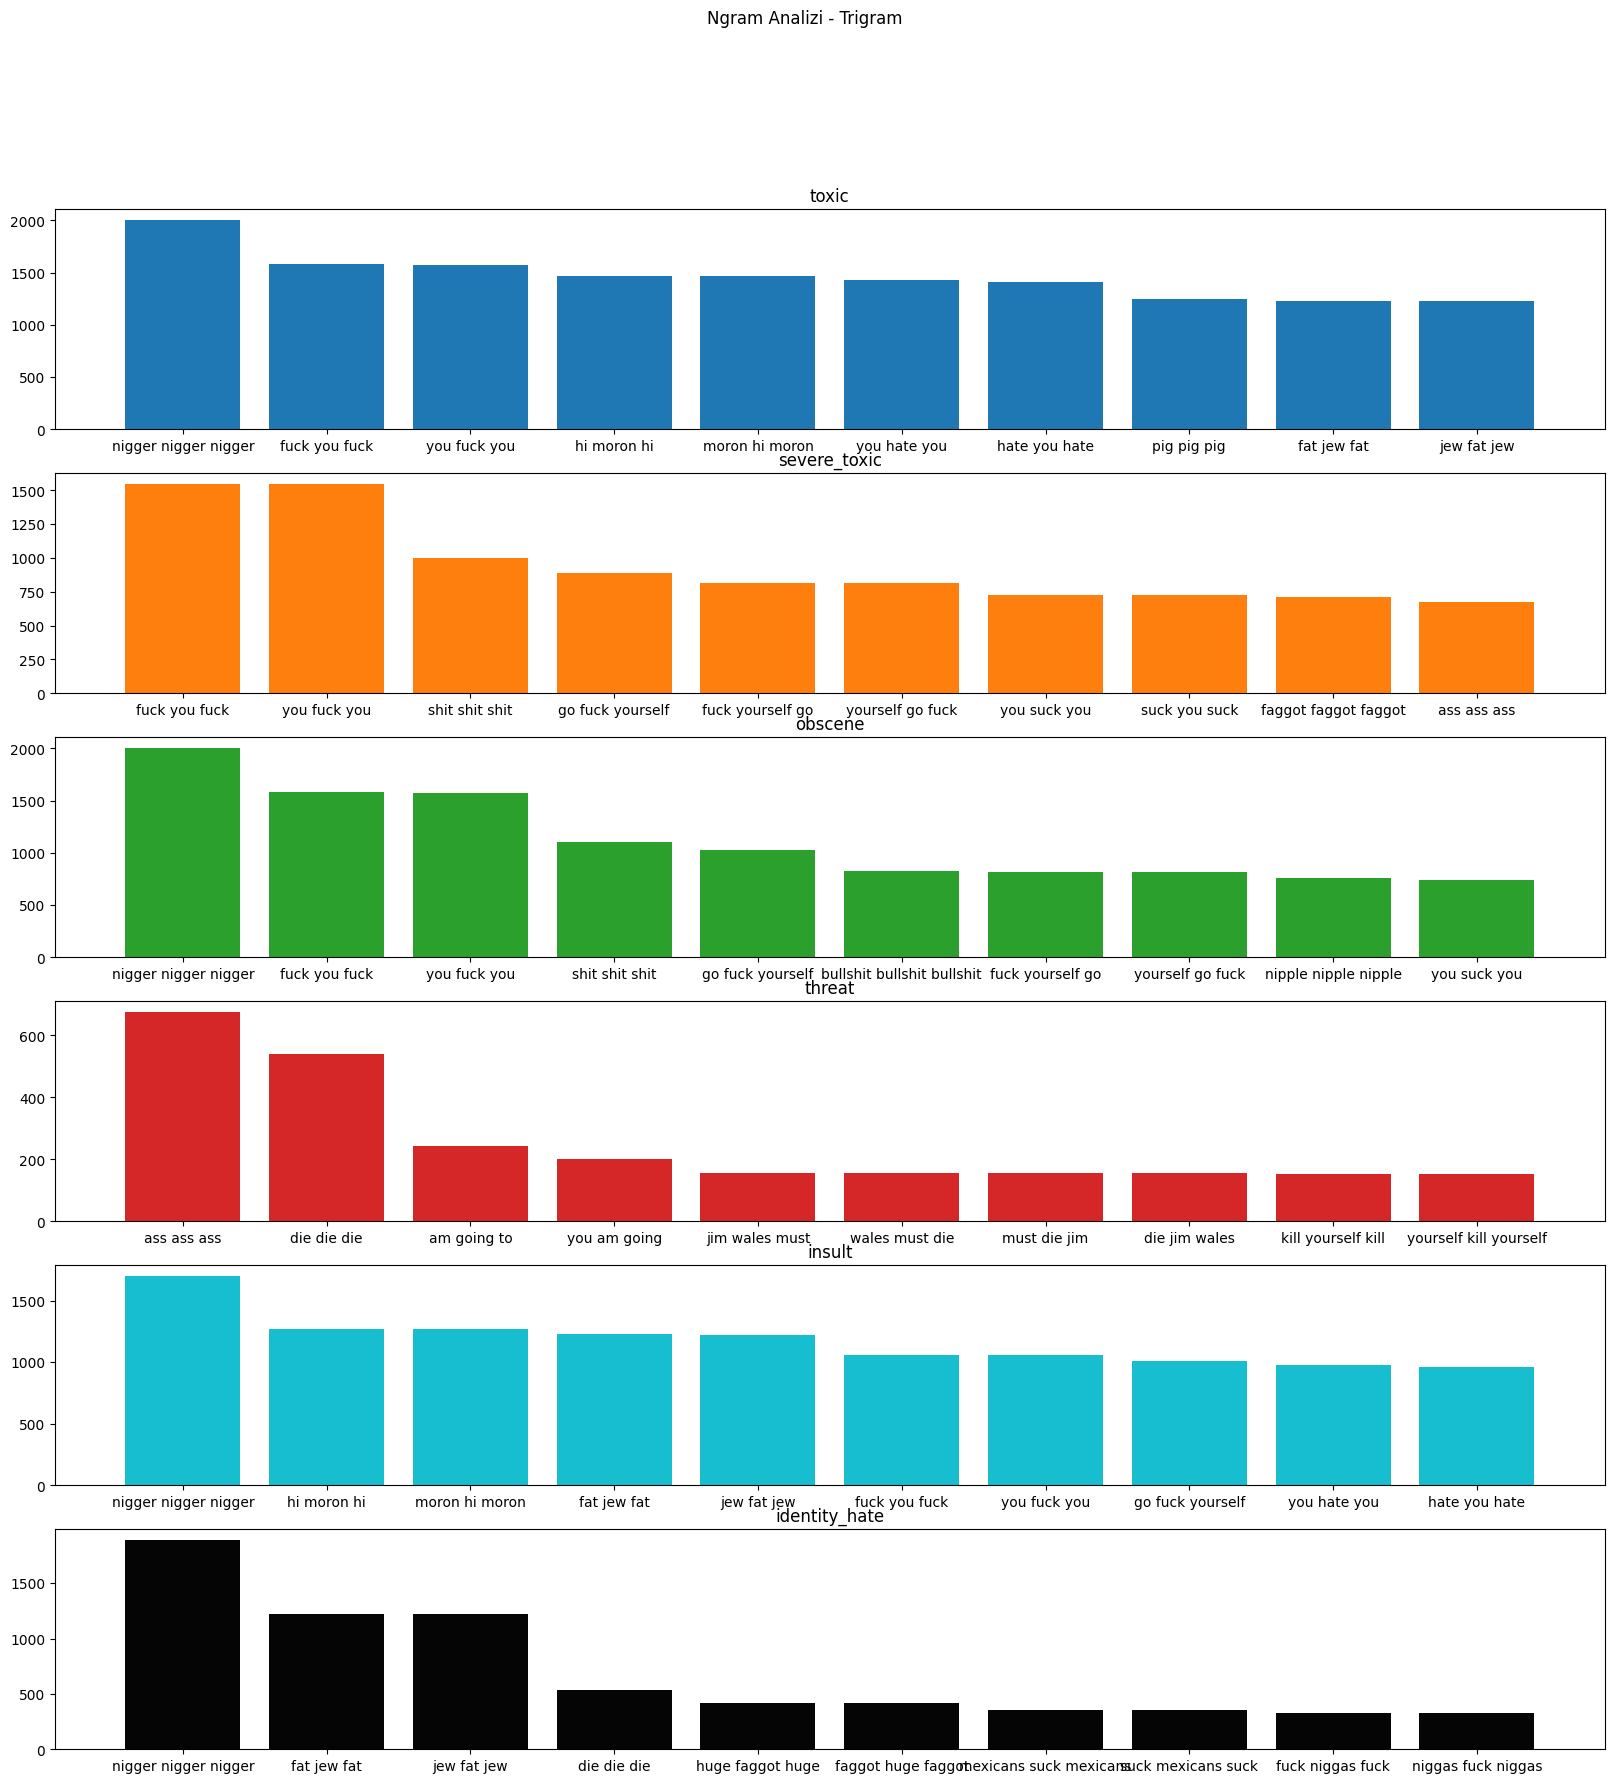

In [152]:
fig,ax = plt.subplots(len(labels),figsize=(20,20))
for ix, classname in enumerate(labels):
    corpus=create_corpus(classname)
    top_text_bigrams=get_top_text_bigrams(train.loc[train[labels[ix]] == 1, :]['comment_text'], ngram=3)[:10]
    x,y=map(list,zip(*top_text_bigrams))
    ax[ix].bar(x,y,color=colors[ix])
    ax[ix].set_title(classname)
fig.suptitle('Ngram Analizi - Trigram')
plt.show()

**WORDCLOUDS**

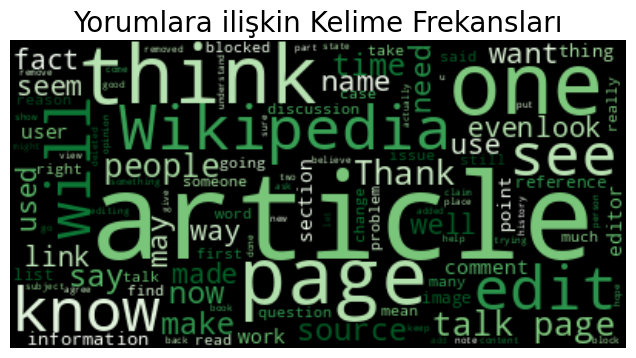

In [154]:
subset=train
text = " ".join(i for i in subset.comment_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Greens").generate(text)
plt.figure( figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Yorumlara ilişkin Kelime Frekansları", fontsize=20)
plt.show()

**HER SINIF İÇİN WORDCLOUDS**

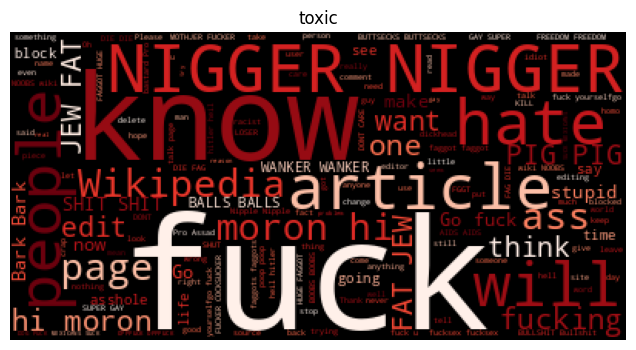

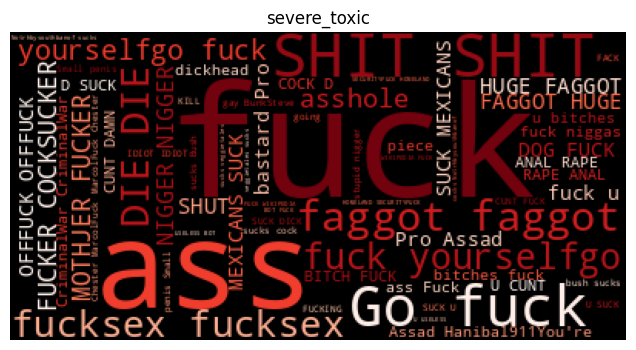

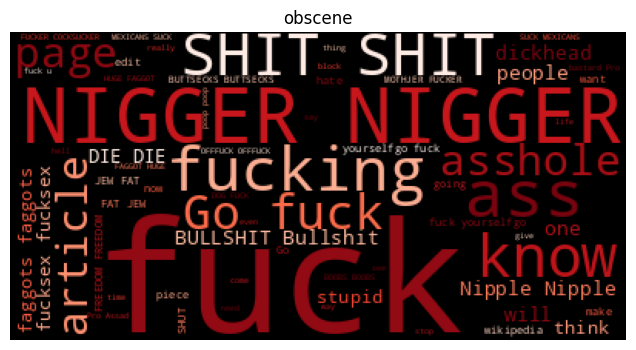

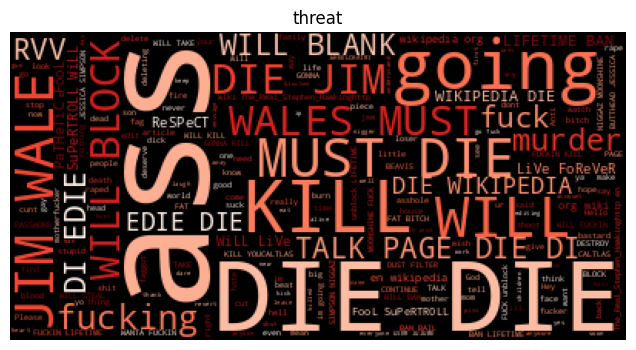

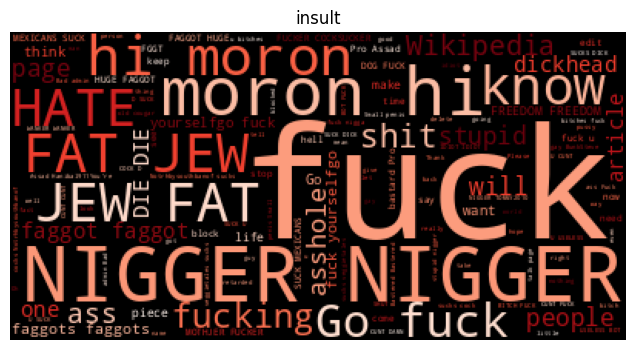

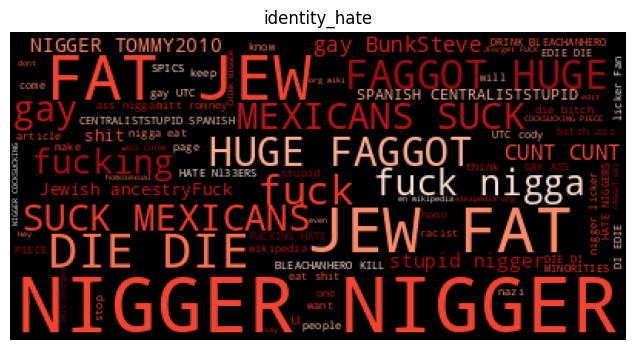

In [155]:
stopwords = set(STOPWORDS)

for l in labels:
    subset = train[train[l]==1]
    text = " ".join(i for i in subset.comment_text)
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=200,
        max_font_size=100, 
        colormap="Reds"
        ).generate(text)

    fig = plt.figure(figsize=(8, 4))
    plt.title(l)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

**HER BİR ÖRNEKLEM İÇİN İÇERDİĞİ BENZERSİZ KELİMELERİN ORANI**

In [156]:
count_word = train["comment_text"].apply(lambda x: len(str(x).split()))
count_unique_word = train["comment_text"].apply(lambda x: len(set(str(x).split())))

In [157]:
unique_percent = count_unique_word*100/count_word
unique_percent

0          95.348837
1         100.000000
2          92.857143
3          72.566372
4         100.000000
             ...    
159566     93.617021
159567    100.000000
159568    100.000000
159569     92.000000
159570     88.888889
Name: comment_text, Length: 159571, dtype: float64

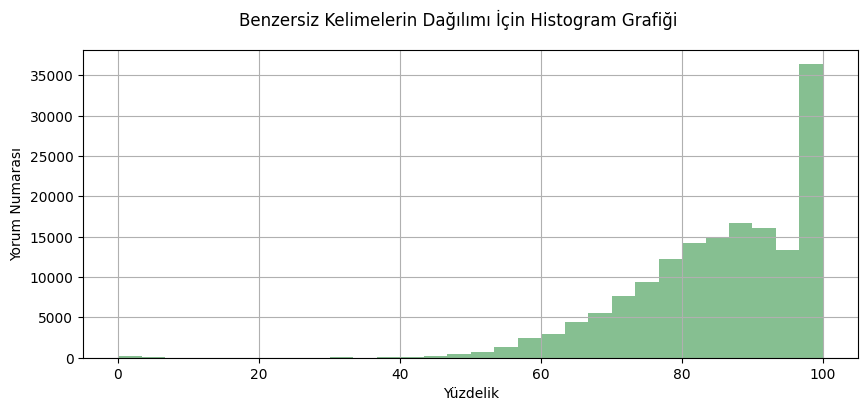

In [161]:
# plot unique words distribution for comments
unique_percent.hist(bins=30, figsize=(10,4), color='#86bf91')
plt.suptitle("Benzersiz Kelimelerin Dağılımı İçin Histogram Grafiği")
plt.xlabel("Yüzdelik")
plt.ylabel("Yorum Numarası")
plt.show()

In [168]:
train=train.iloc[:,2:]
train.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


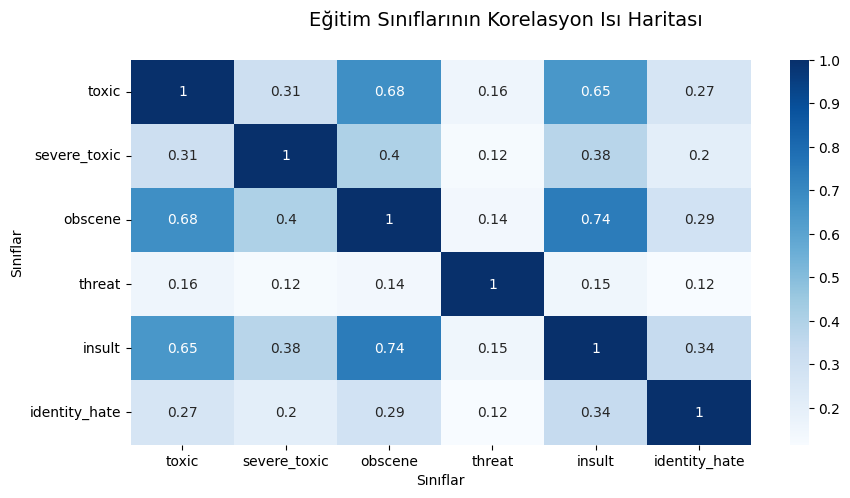

In [172]:
fig = plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot=True,cmap="Blues")
plt.suptitle('Eğitim Sınıflarının Korelasyon Isı Haritası',size = 14)
plt.xlabel("Sınıflar")
plt.ylabel("Sınıflar")
plt.show()

In [174]:
abs(train.corr()) >= 0.6

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,True,False,True,False,True,False
severe_toxic,False,True,False,False,False,False
obscene,True,False,True,False,True,False
threat,False,False,False,True,False,False
insult,True,False,True,False,True,False
identity_hate,False,False,False,False,False,True
